# Analyzing global internet patterns

## 🧾 Executive summary
Internt usage has changed dramatically over time. While some countries enjoy usage over 95% (proportion of population), others still only see 11.3% with access to the internet (Burundi, 2022). In 2000, Norway reported 52.8% of the population enjoyed access to the internet - the highest at the time. In 2022, Bahrain, Qatar, The UAE, Saudi Arabia all reported 100% usage of the internet. In the same year, the global mean average access to at least one 4g network, was 86.9% of the population. 


## 📖 Background
In this competition, you'll be exploring a dataset that highlights internet usage for different countries from 2000 to 2023. Your goal is import, clean, analyze and visualize the data in your preferred tool.

The end goal will be a clean, self explanatory, and interactive visualization. By conducting a thorough analysis, you'll dive deeper into how internet usage has changed over time and the countries still widely impacted by lack of internet availability. 


## 💾 Data

#### You have access to the following file, but you can supplement your data with other sources to enrich your analysis. 

### Internet Usage (`internet_usage.csv`)
|   Column name  |   Description | 
|---------------|-----------|
| Country Name | Name of the country |
| Country Code | Countries 3 character country code|
| 2000 | Contains the % of population of individuals using the internet in 2000  |
| 2001 | Contains the % of population of individuals using the internet in 2001  |
| 2002 | Contains the % of population of individuals using the internet in 2002  |
| 2003 | Contains the % of population of individuals using the internet in 2003  |
| .... | ...  |
| 2023 | Contains the % of population of individuals using the internet in 2023  |

### Internet Usage by gender (`internet_access_genders.csv`)
|   Column name  |   Description | 
|---------------|-----------|
|Series Name|World bank provided description of development indicator: Individuals using the internet, as % of respective population.|
| Country Name | Name of the country |
| Country Code | Countries 3 character country code|
| 2000 | Contains the % of population of male/female individuals using the internet in 2000  |
| .... | ...  |
| 2023 | Contains the % of population of male/female individuals using the internet in 2023  |

### Economic Indicators (`economic_indicators.csv`)
This contains data for GDP, GINI index, and Human capital index, though only GDP was used in the final analysis.
|   Column name  |   Description | 
|---------------|-----------|
|Series Name|Type of economic indicator used (GDP, GINI, Human Capital Index (HCI))|
| Country Name | Name of the country |
| Country Code | Countries 3 character country code|
| 2000 | Value for this indicator in 2000  |
| .... | ...  |
| 2023 | Value for this indicator in 2023  |

### Secure internet servers (`secure_internet_servers.csv`)
|   Column name  |   Description | 
|---------------|-----------|
|Series Name|Number of secure internet servers per 1 million people|
| Country Name | Name of the country |
| Country Code | Countries 3 character country code|
| 2014 | Number of secure internet servers per 1 million people in 2014  |
| .... | ...  |
| 2023 | Number of secure internet servers per 1 million people in 2023 |

### Share with 4G mobile network coverage (`secure_internet_servers.csv`)
|   Column name  |   Description | 
|---------------|-----------|
|Series Name|Number of secure internet servers per 1 million people|
| Entity | Name of the country |
| Code | Countries 3 character country code|
| Year | Number of secure internet servers per 1 million people in 2014  |
| Proportion of population covered by at least a 4g network | Percentage |


## 🌐 Dashboard link
https://analytics.zoho.eu/open-view/254652000000012709

## 📷 Dashboard screenshot
![screenshot](/screenshot2.png)

### 1. Preparing internet access data


In [40]:
import pandas as pd
import numpy as np
import missingno as msno

# load data
internet_usage = pd.read_csv("data/downloads/internet_usage.csv") 

In [41]:
# check for missing values
internet_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  217 non-null    object
 1   Country Code  217 non-null    object
 2   2000          217 non-null    object
 3   2001          217 non-null    object
 4   2002          217 non-null    object
 5   2003          217 non-null    object
 6   2004          217 non-null    object
 7   2005          217 non-null    object
 8   2006          217 non-null    object
 9   2007          217 non-null    object
 10  2008          217 non-null    object
 11  2009          217 non-null    object
 12  2010          217 non-null    object
 13  2011          217 non-null    object
 14  2012          217 non-null    object
 15  2013          217 non-null    object
 16  2014          217 non-null    object
 17  2015          217 non-null    object
 18  2016          217 non-null    object
 19  2017    

<Axes: >

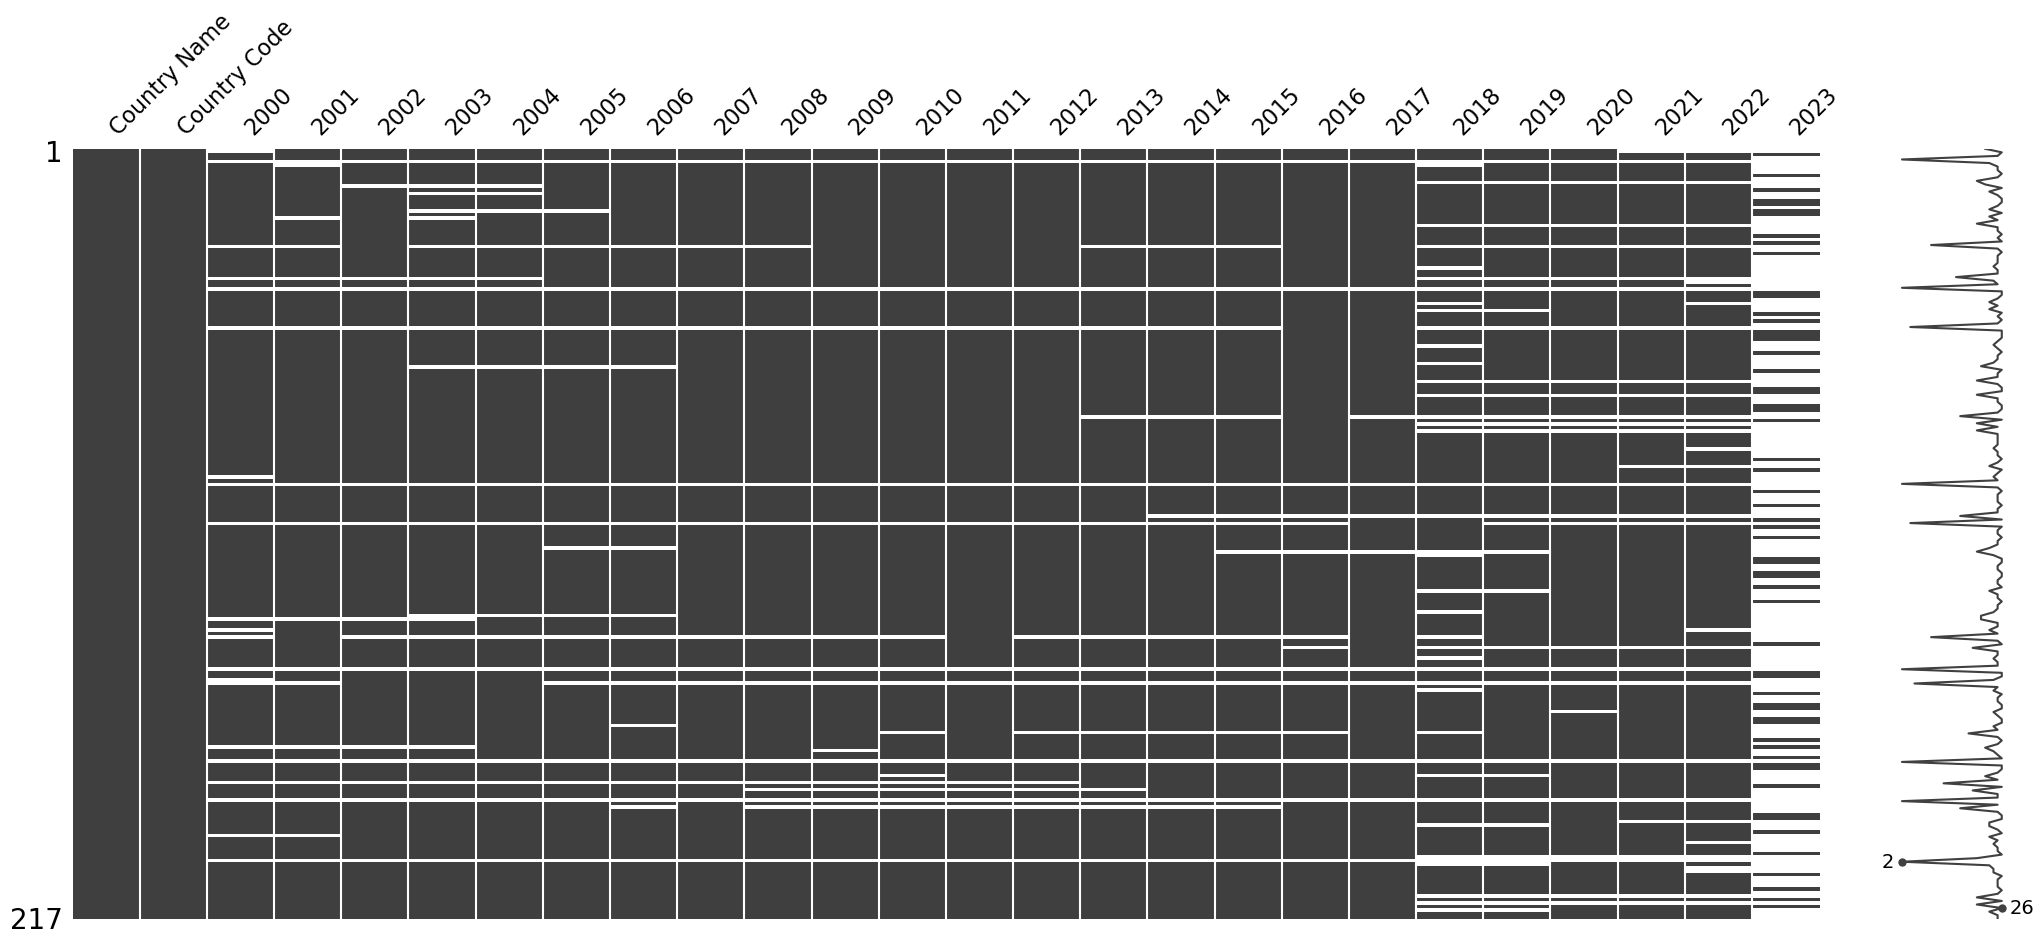

In [42]:
# there are no 'null values', so replace the '..' with NaN
internet_usage.replace('..', np.nan, inplace=True)

# visualise missing data
msno.matrix(internet_usage)

<Axes: >

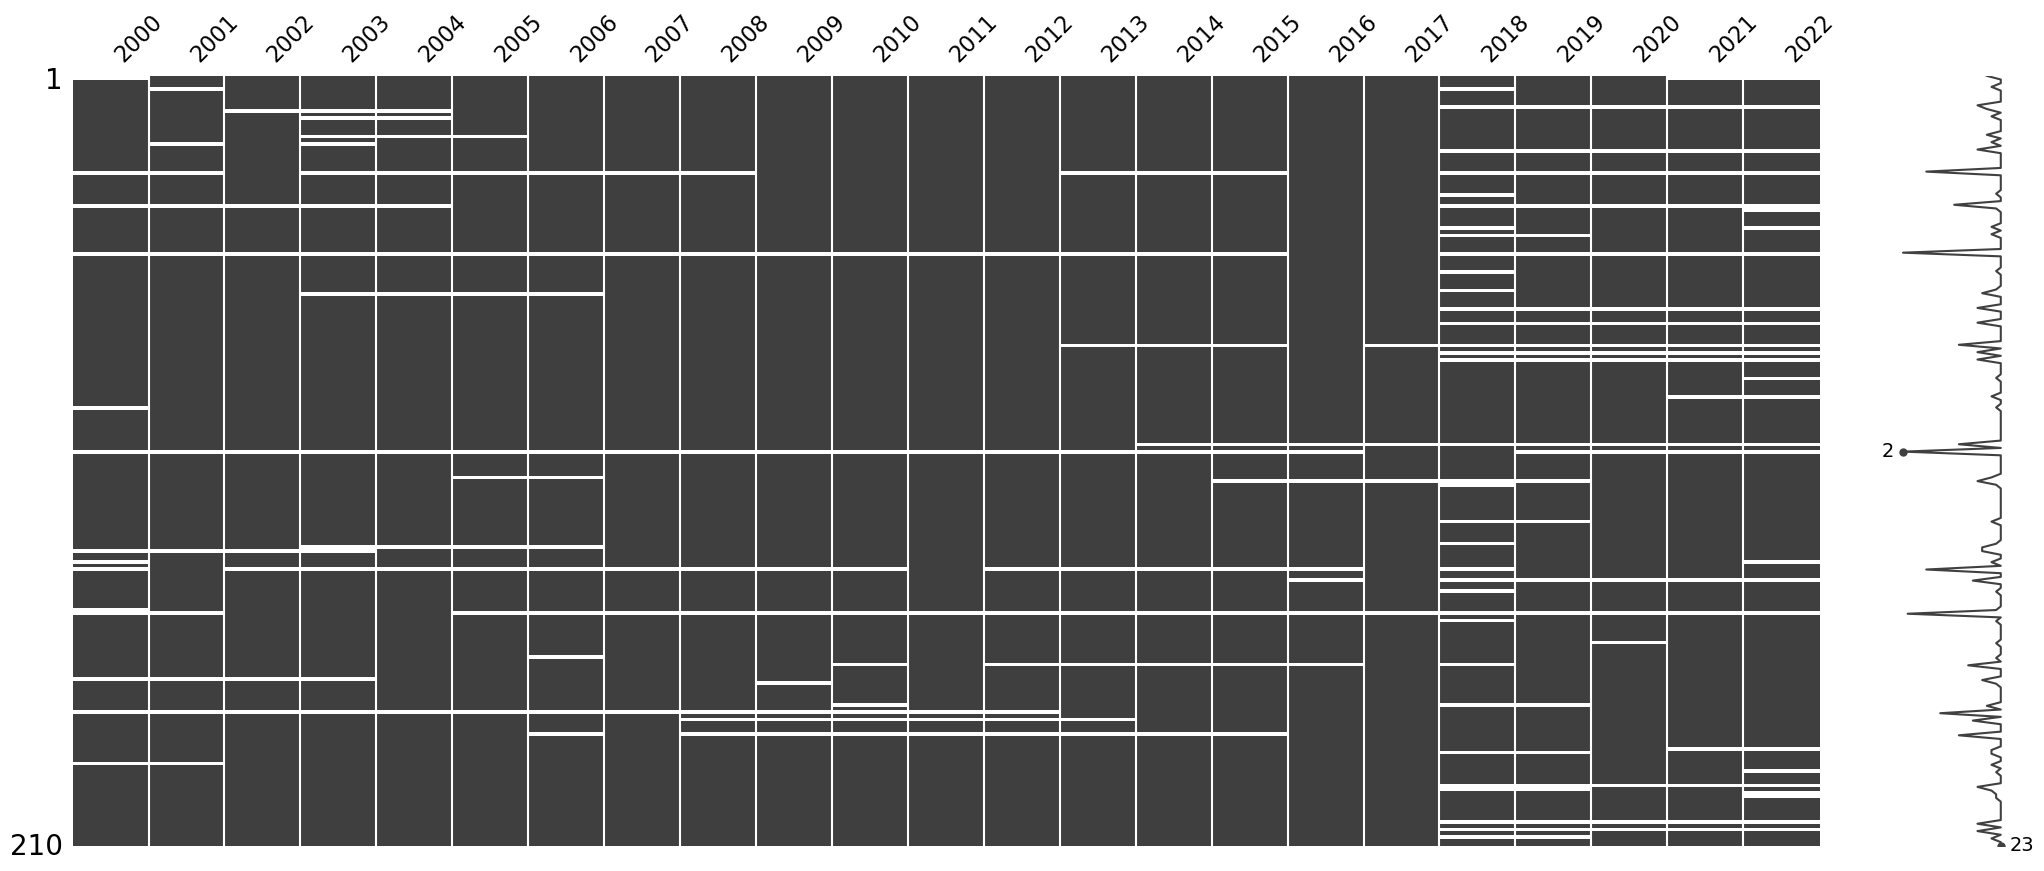

In [43]:
# set index
internet_usage.set_index(['Country Name', 'Country Code'], inplace=True)

# 2023 is missing a lot of data, so drop this column
internet_usage.drop(columns='2023', inplace=True)

# drop rows missing data every year
all_years: list[str] = [str(year) for year in range(2000, 2023)]
internet_usage.dropna(axis=0, how='all', subset=all_years, inplace=True)

# visualise results
msno.matrix(internet_usage)

<Axes: >

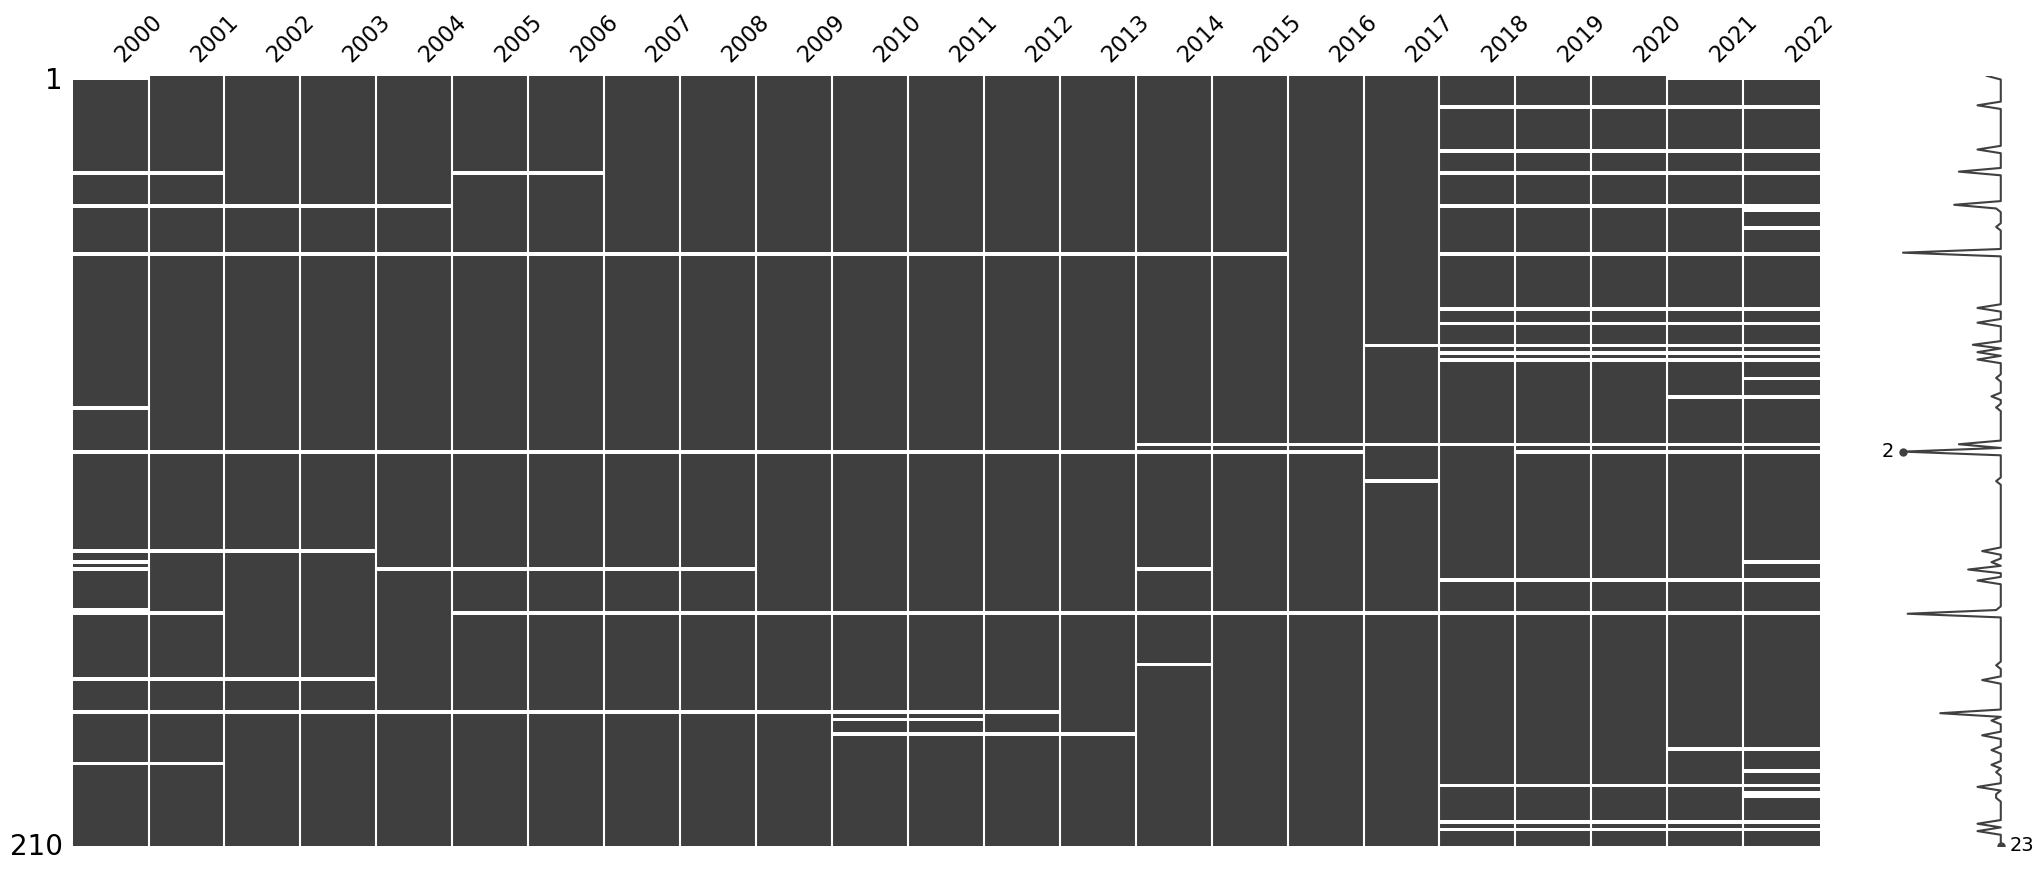

In [44]:
# still lots of missing data, so fill from the previous/lead year 
# a maximum of 2 times
# limit area inside to only fill NaNs if surrounded by valid values
internet_usage = internet_usage.T
internet_usage.ffill(limit=2, inplace=True, limit_area='inside')
internet_usage.bfill(limit=2, inplace=True, limit_area='inside')

# visualise results
msno.matrix(internet_usage.T)

In [45]:
# view data
internet_usage.head()

Country Name,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Country Code,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,ABW,AUS,...,URY,UZB,VUT,VEN,VNM,VIR,PSE,YEM,ZMB,ZWE
2000,NaN,0.114097,0.491706,10.5388,0.105046,6.48223,7.03868,1.30047,15.4428,46.7561,...,10.5391,0.484347,2.10834,3.3596,0.254248,13.8151,1.11131,0.0825004,0.191072,0.401434
2001,0.00472257,0.325798,0.646114,10.5388,0.136014,8.89929,9.78081,1.63109,17.1,52.6893,...,11.1214,0.597568,2.83057,4.636,1.26565,18.3758,1.83685,0.0908025,0.23313,0.799846
2002,0.0045614,0.390081,1.59164,11.2605,0.270377,12.5,10.8821,1.96041,18.8,52.6893,...,11.4195,1.08194,3.51004,4.91045,1.855,27.4944,3.10009,0.518796,0.477751,1.1
2003,0.0878913,0.9719,2.19536,13.5464,0.370682,17.2286,11.9137,4.57522,20.8,52.6893,...,15.9371,1.9126,3.9033,7.49996,3.78028,27.4291,4.13062,0.604734,0.980483,1.8
2004,0.105809,2.42039,4.63448,26.838,0.464815,24.2665,16.0367,4.89901,23,63,...,17.0631,2.59373,4.7466,8.40447,7.64241,27.377,4.4009,0.881223,1.1,2.1


In [46]:
# Reverse transposition
internet_usage = internet_usage.T

# Update data types
internet_usage = internet_usage.astype('float')
internet_usage.dtypes

2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object

In [47]:
# Round floating point numbers to 2 d.p.
internet_usage = internet_usage.apply(round, args=([2]))

# Save to csv
internet_usage.to_csv('data/export/internet_usage.csv')

# view data
internet_usage.head()

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,NaN,0.00,0.00,0.09,0.11,1.22,2.11,1.90,1.84,3.55,...,5.9,7.00,8.26,11.00,13.50,16.80,17.60,18.40,NaN,NaN
Albania,ALB,0.11,0.33,0.39,0.97,2.42,6.04,9.61,15.04,23.86,41.20,...,51.8,54.30,56.90,59.60,62.40,65.40,68.55,72.24,79.32,82.61
Algeria,DZA,0.49,0.65,1.59,2.20,4.63,5.84,7.38,9.45,10.18,11.23,...,22.5,29.50,38.20,42.95,47.69,49.04,58.98,60.65,66.24,71.24
Andorra,AND,10.54,10.54,11.26,13.55,26.84,37.61,48.94,70.87,70.04,78.53,...,84.4,86.10,87.90,89.70,91.57,91.57,90.72,93.21,93.90,94.49
Angola,AGO,0.11,0.14,0.27,0.37,0.46,1.14,1.50,1.70,1.90,2.30,...,13.0,21.36,22.00,23.20,26.00,29.00,32.13,36.63,37.81,39.29


In [48]:
# reshape data in long format for racing chart
internet_usage_lf = internet_usage.reset_index().melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='access %')

# save to csv
internet_usage_lf.to_csv('data/export/internet_usage_long.csv')

# view data
internet_usage_lf.head()

,Country Name,Country Code,Year,access %
0,Afghanistan,AFG,2000,NaN
1,Albania,ALB,2000,0.11
2,Algeria,DZA,2000,0.49
3,Andorra,AND,2000,10.54
4,Angola,AGO,2000,0.11


### Adding external data

We'll bring in some more data for this project, starting with data from the World Bank. This is the same data source, but the downloaded data has had less pre-process, namely on column names.

Let's create some functions to handle this data.

In [50]:
# Code to process world bank data
def load_world_bank_data(file_path: str) -> pd.DataFrame:
    """Load, clean, rename columns
    Params:
    file_path: str: Path to file on drive. Must be to .csv file.
    
    Returns:
    df: pandas DataFrame"""
    index_cols: list[str] = ['Series Name', 'Country Name', 'Country Code']

    # Load the dataframe
    df = pd.read_csv(file_path, index_col=index_cols)
    
    # Remove unneed column
    df.drop('Series Code', axis=1, inplace=True)

    # Remove the last two rows
    df.drop([-1, -2], inplace=True)

    # drop fully missing rows
    df.dropna(how='all', inplace=True)

    # Rename year columns
    df.rename(lambda x: x[:4], axis='columns', inplace=True)
    
    return df


# function export world bank data
def export_world_bank_data(df: pd.DataFrame, file_name: str) -> None:
    """Save dateframe as csv in wide and long format"""
    directory = 'data/export/'

    # export in wide format (As is)
    df.to_csv(f"data/export/{file_name}.csv")


def transform_to_long(df, id_vars: list[str], var_name: str, value_name: str) -> pd.DataFrame:
    df_long = df.reset_index().melt(id_vars=id_vars, var_name=var_name, value_name=value_name)
    return df_long


#### 1.1 Internet usage by gender

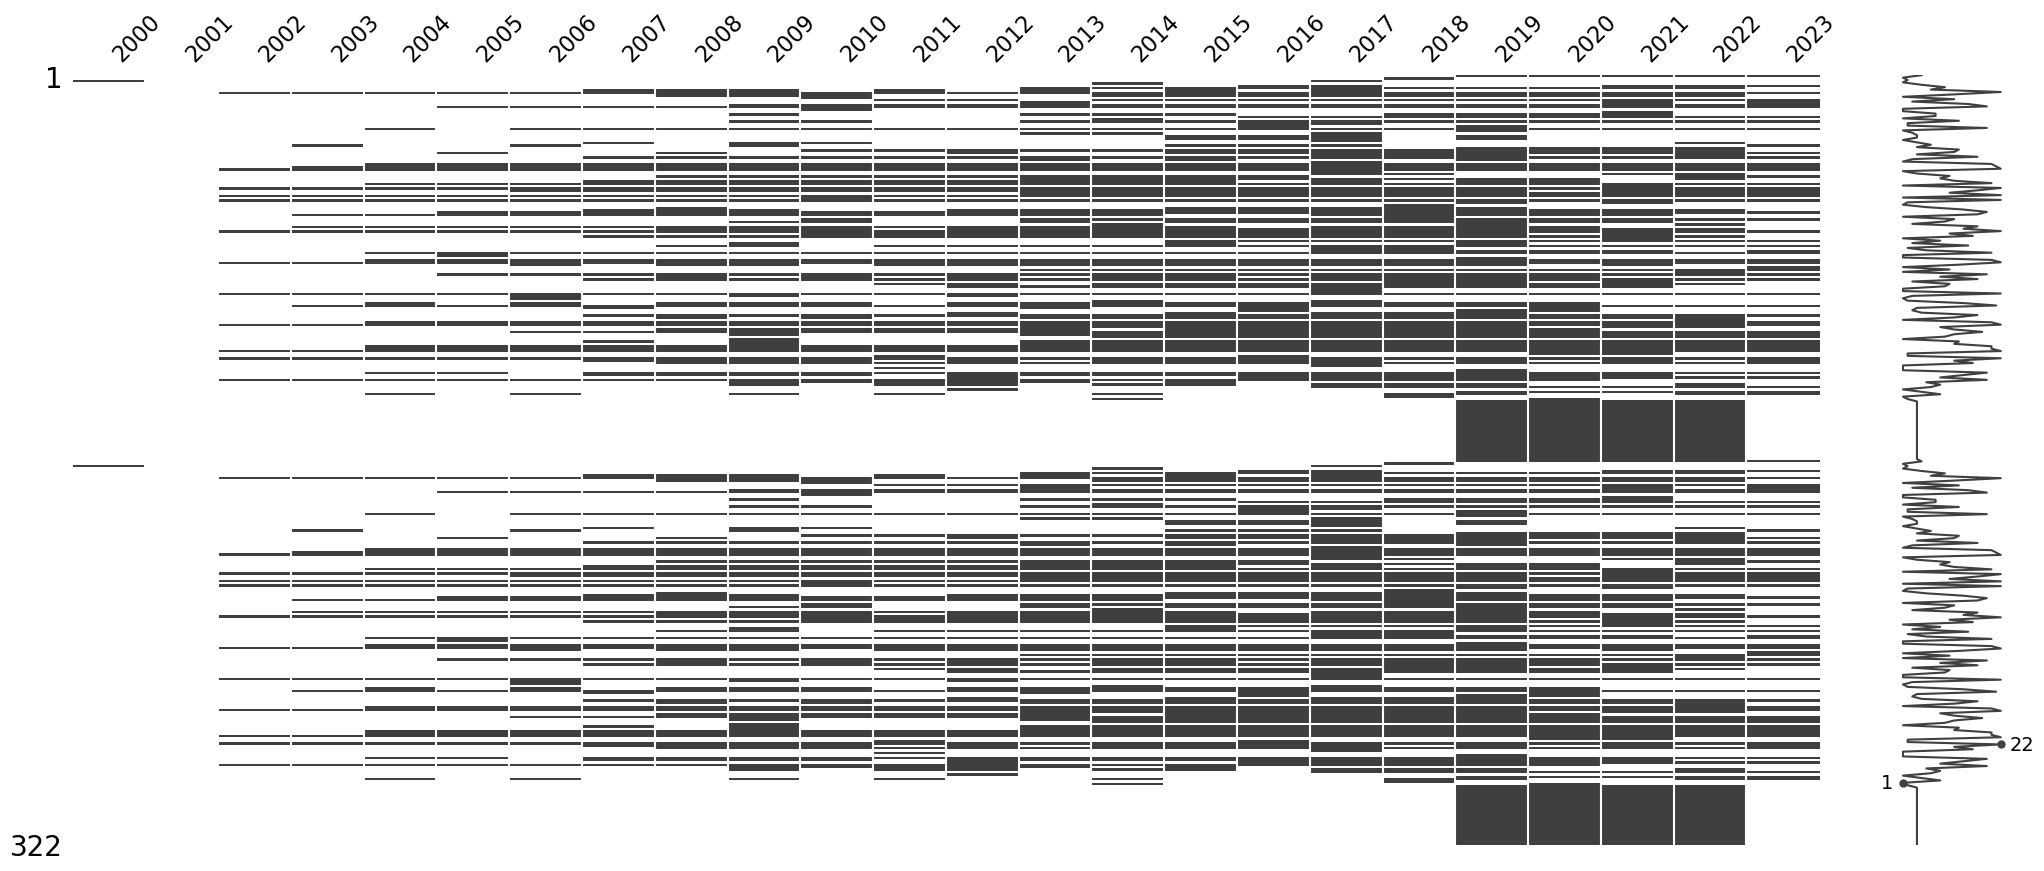

In [51]:
# load data
gender_usage = load_world_bank_data('data/downloads/access_genders/internet_access_genders.csv')

# View null value matrix
msno.matrix(gender_usage)

# Transform to long format
gender_usage_long = transform_to_long(gender_usage, id_vars=['Series Name', 'Country Name', 'Country Code'], \
                    var_name='Year', value_name='% of pop')

# Export gender usage data
export_world_bank_data(gender_usage, 'gender_usage')
export_world_bank_data(gender_usage_long, 'gender_usage_long')

### 2. Subscription type

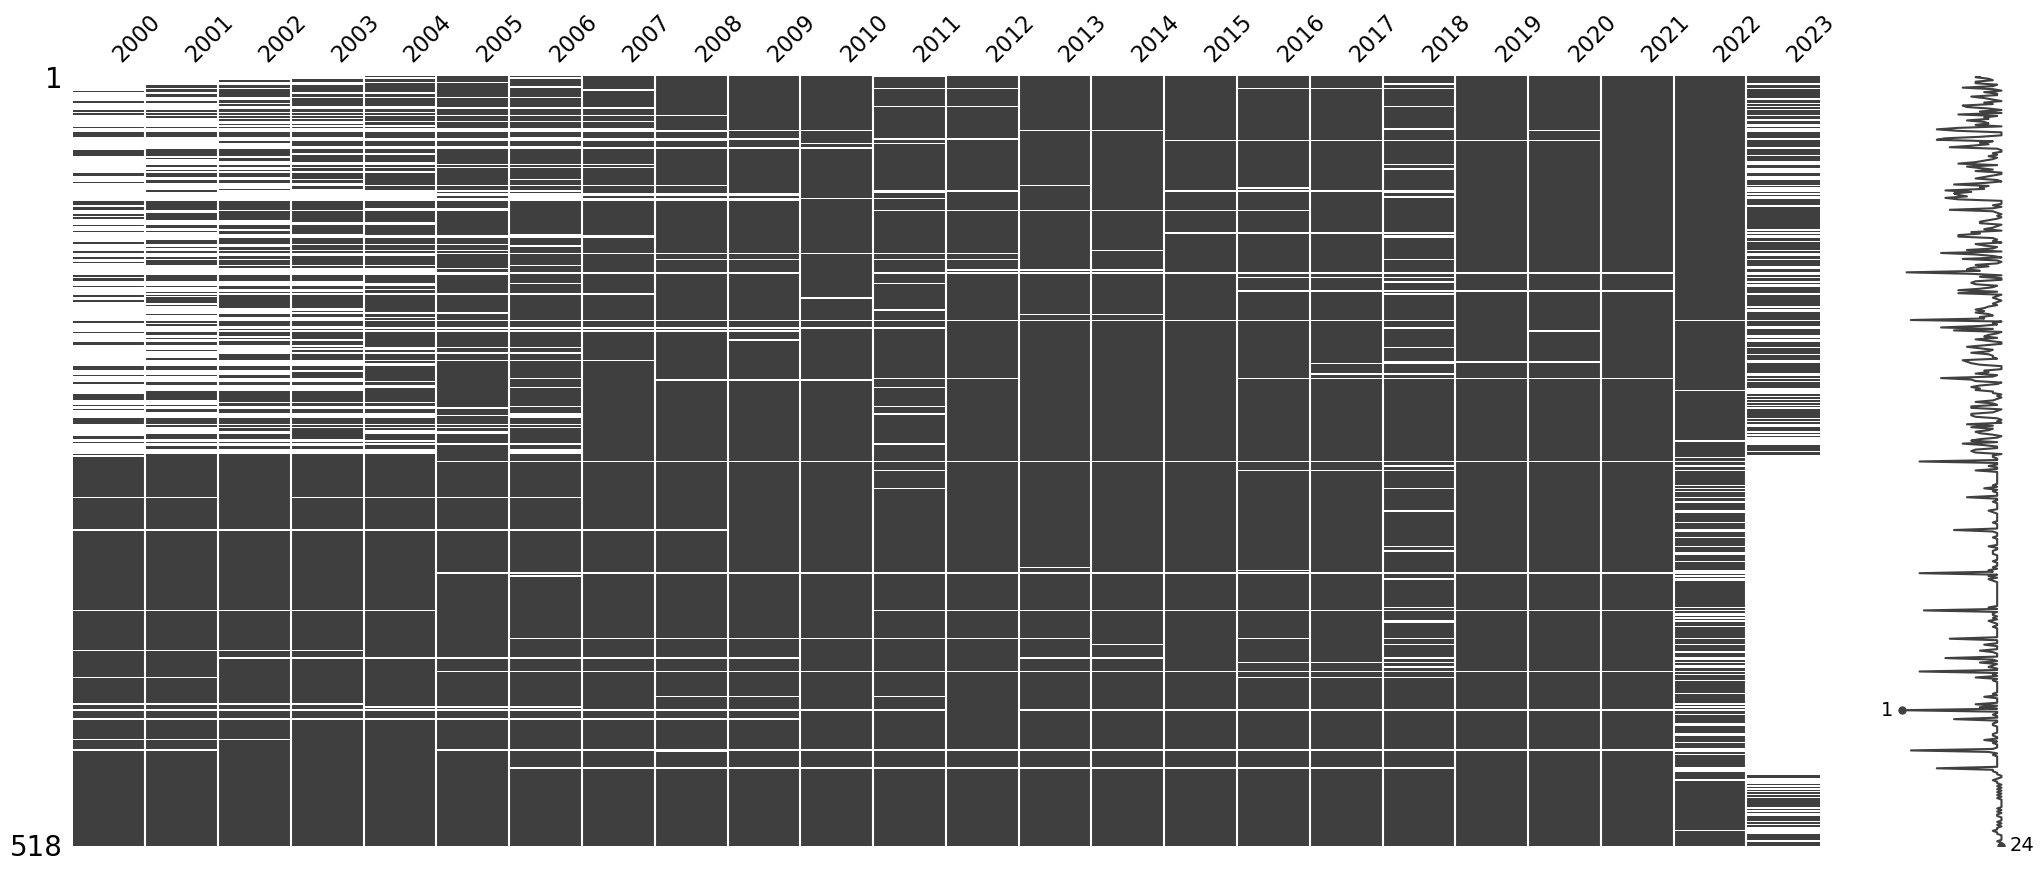

In [52]:
# load data
subscriptions = load_world_bank_data('data/downloads/broadband_cellular_subscriptions/broadband_cellular_subscriptions.csv')

# View null value matrix
msno.matrix(subscriptions)

# transform to long format
subscriptions_long = transform_to_long(subscriptions, id_vars=['Series Name', 'Country Name', 'Country Code'], \
                    var_name='Year', value_name='subs per 100')

# Export the data
export_world_bank_data(subscriptions, 'subscriptions')
export_world_bank_data(subscriptions_long, 'subscriptions_long')

### 3. Internet servers

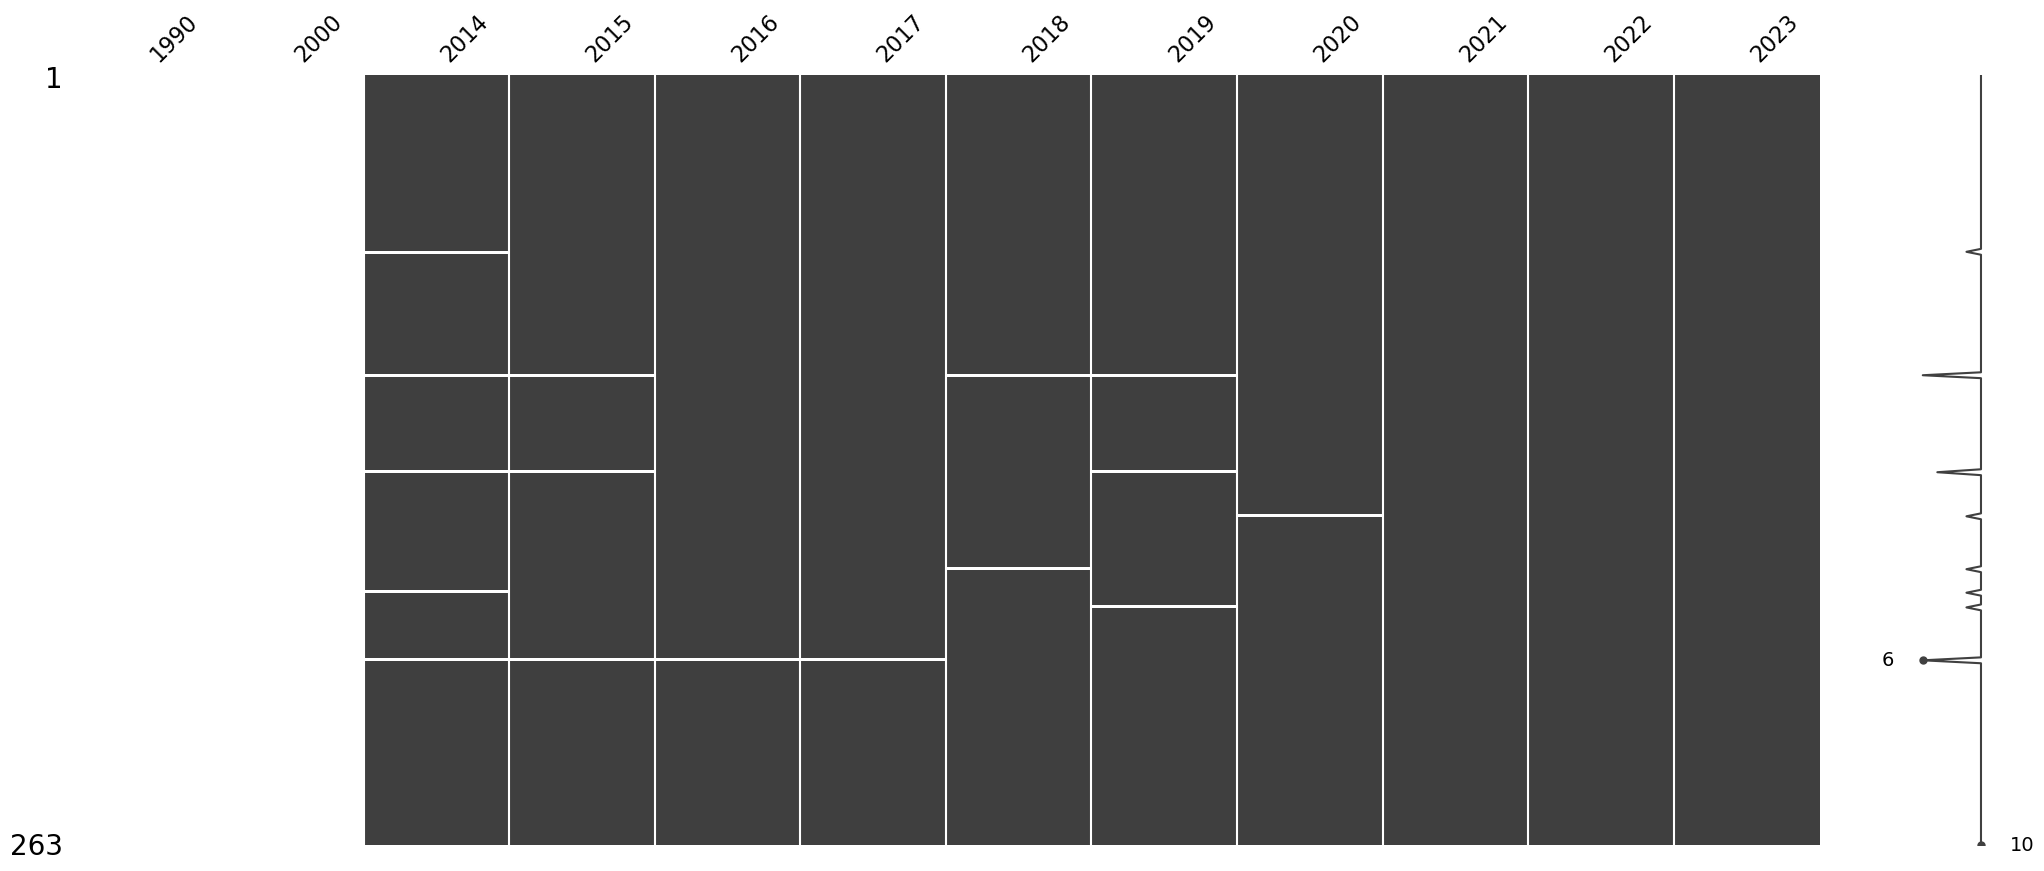

In [53]:
# Load internet server data
internet_servers = load_world_bank_data('Data/downloads/secure_internet_servers/secure_internet_servers.csv')

# view null value matrix
msno.matrix(internet_servers)

# 1990 and 2000 completely empty
internet_servers.drop(['1990', '2000'], axis=1, inplace=True)

# Transform to long format
internet_servers_long = transform_to_long(internet_servers, id_vars=['Series Name', 'Country Name', 'Country Code'], \
                    var_name='Year', value_name='no. servers')

# Export the data
export_world_bank_data(internet_servers, 'internet_servers')
export_world_bank_data(internet_servers_long, 'internet_servers_long')

### 4. 4g Coverage

Now let's get some data from other sources
- Share of people in range of 4G network: Data sources: International Telecommunication Union – processed by Our World in Data

In [54]:
# Load data from Our World in Data
four_g_access = pd.read_csv('data\downloads\share-with-4g-mobile-network-coverage\share-with-4g-mobile-network-coverage.csv',
                names=['Country Name', 'Country Code', 'Year', 'Series Name'], skiprows=1)
                
# Reshape to wide format
four_g_access_wide = four_g_access.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Series Name')
four_g_access_wide.reset_index(inplace=True)

# Export data
four_g_access.to_csv('data/export/4g_access_long.csv')
four_g_access_wide.to_csv('data/export/4g_access.csv')

<positron-console-cell-54>:2: SyntaxWarning: invalid escape sequence '\d'


### 5. Other Economic Indicators

<positron-console-cell-55>:2: SyntaxWarning: invalid escape sequence '\d'


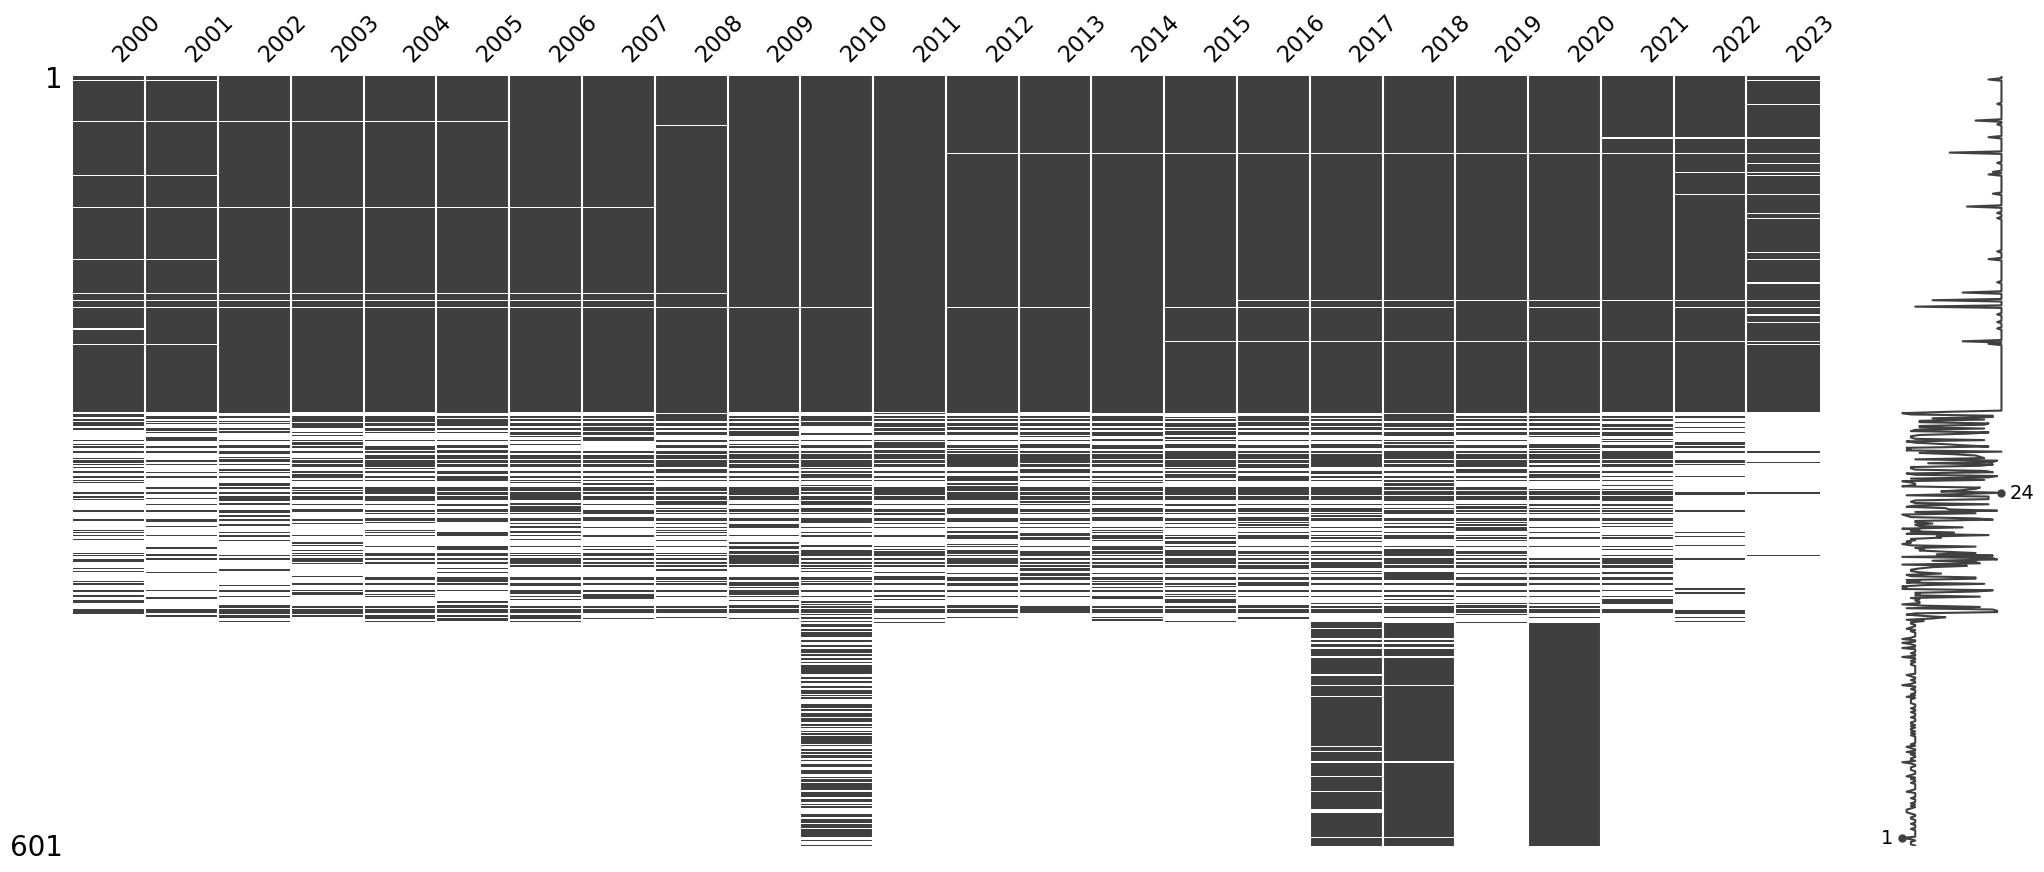

In [55]:
# Load other standard development indicators
economic_indicators = load_world_bank_data('data\downloads\economic_indicators\economic_indicators.csv')

# view missing data
msno.matrix(economic_indicators)

# Transform to long format
economic_indicators_long = transform_to_long(economic_indicators, id_vars=['Series Name', 'Country Name', 'Country Code'],\
                                            var_name='Year', value_name='value')

# Export data
export_world_bank_data(economic_indicators, 'economic_indicators')
export_world_bank_data(economic_indicators_long, 'economic_indicators_long')

## Export to Zoho Analytics
We'll create the dashboard in Zoho Analytics. First we'll upload the data using the Python SDK.

In [56]:
from urllib import request
from zipfile import ZipFile
import os

# download the Zoho Analytics Python SDK
url = 'https://downloads.zohocdn.com/analytics-api-desktop/restapi/v2/2.6.0/lib/eu/python/ZohoAnalyticsPythonLib_v2.zip'

request.urlretrieve(url, 'ZohoSDK.zip')

# Extract the downloaded ZIP file
with ZipFile('ZohoSDK.zip', 'r') as zip_file:
    zip_file.extractall()
    print("Files extracted successfully")

# Remove the ZIP file after extraction
os.remove('ZohoSDK.zip')

Files extracted successfully


### Starting the Zoho Analytics SDK

In [59]:
from Zoho.ZohoAnalyticsPythonClient.AnalyticsClient import AnalyticsClient
from za_config import CLIENT_ID, CLIENT_SECRET, AUTH_TOKEN

In [60]:
# Import data to Zoho analytics
zoho_client = AnalyticsClient(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, refresh_token=AUTH_TOKEN)
zoho_client.get_orgs()

ServerError: 'Exception while generating oauth token. Response - {"error":"invalid_code"}'

### SDK errors
Unfortunately I kept running into errors with this task, so stuck with manually importing data with the .csv files created earlier.